In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\mmoud\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\mmoud\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

In [2]:
data = pd.read_csv('us_disruptions_2000-2021_all.csv')
data

,Year,Disruption,Duration,Likelihood,Warning Capability,Disruption Position
0,2000,Fire at the Philips microchip plant,Acute,Rare,No,Single tier
1,2000,Tropical cyclone - Leslie,Acute,Reoccurring,Yes,Multi-tiered
2,2001,Land Rover lay-off,Acute,Rare,No,Single tier
3,2001,9/11 terrorist attack,Acute,Rare,No,Multi-tiered
4,2001,Tropical cyclone - Allison,Acute,Reoccurring,Yes,Multi-tiered
...,...,...,...,...,...,...
85,2020,COVID-19 - Good shortage,Chronic,Rare,Yes,Multi-tiered
86,2020,U.S.-China Trade War,Chronic,Rare,Yes,Multi-tiered
87,2021,Energy Cyber Attack,Acute,Reoccurring,No,NaN
88,2021,Colonial Pipeline cyber attack,Acute,Reoccurring,No,Multi-tiered


In [3]:
# data.boxplot('dep_time','origin',rot = 30,figsize=(5,6))
cat_df = data[['Year','Duration','Likelihood','Warning Capability', 'Disruption Position']].copy()
# cat_df['Disruption Position'].unique()
cat_df_onehot = pd.get_dummies(cat_df)
cat_df_onehot

,Year,Duration_Acute,Duration_Acute,Duration_Chronic,Likelihood_Rare,Likelihood_Rare,Likelihood_Reoccurring,Warning Capability_No,Warning Capability_Yes,Disruption Position_Multi-tiered,Disruption Position_Single tier
0,2000,1,0,0,1,0,0,1,0,0,1
1,2000,1,0,0,0,0,1,0,1,1,0
2,2001,0,1,0,0,1,0,1,0,0,1
3,2001,1,0,0,1,0,0,1,0,1,0
4,2001,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
85,2020,0,0,1,1,0,0,0,1,1,0
86,2020,0,0,1,0,1,0,0,1,1,0
87,2021,1,0,0,0,0,1,1,0,0,0
88,2021,1,0,0,0,0,1,1,0,1,0


In [4]:
# normalize year column
cat_df_onehot['Year'] = (cat_df_onehot['Year'] - 2000)/(2021-2000)


In [5]:
cat_df_onehot

,Year,Duration_Acute,Duration_Acute,Duration_Chronic,Likelihood_Rare,Likelihood_Rare,Likelihood_Reoccurring,Warning Capability_No,Warning Capability_Yes,Disruption Position_Multi-tiered,Disruption Position_Single tier
0,0.000000,1,0,0,1,0,0,1,0,0,1
1,0.000000,1,0,0,0,0,1,0,1,1,0
2,0.047619,0,1,0,0,1,0,1,0,0,1
3,0.047619,1,0,0,1,0,0,1,0,1,0
4,0.047619,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
85,0.952381,0,0,1,1,0,0,0,1,1,0
86,0.952381,0,0,1,0,1,0,0,1,1,0
87,1.000000,1,0,0,0,0,1,1,0,0,0
88,1.000000,1,0,0,0,0,1,1,0,1,0


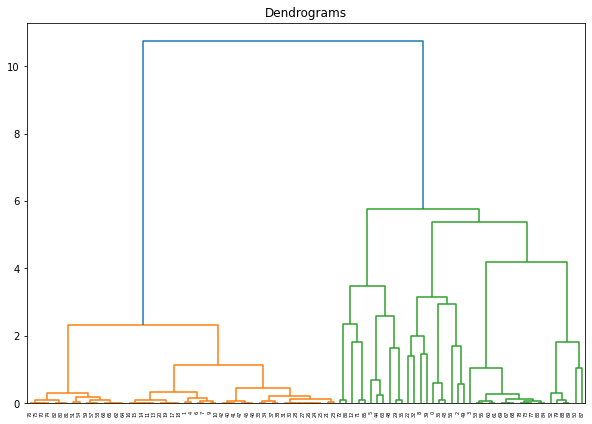

In [6]:
## print dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cat_df_onehot, method='ward'))

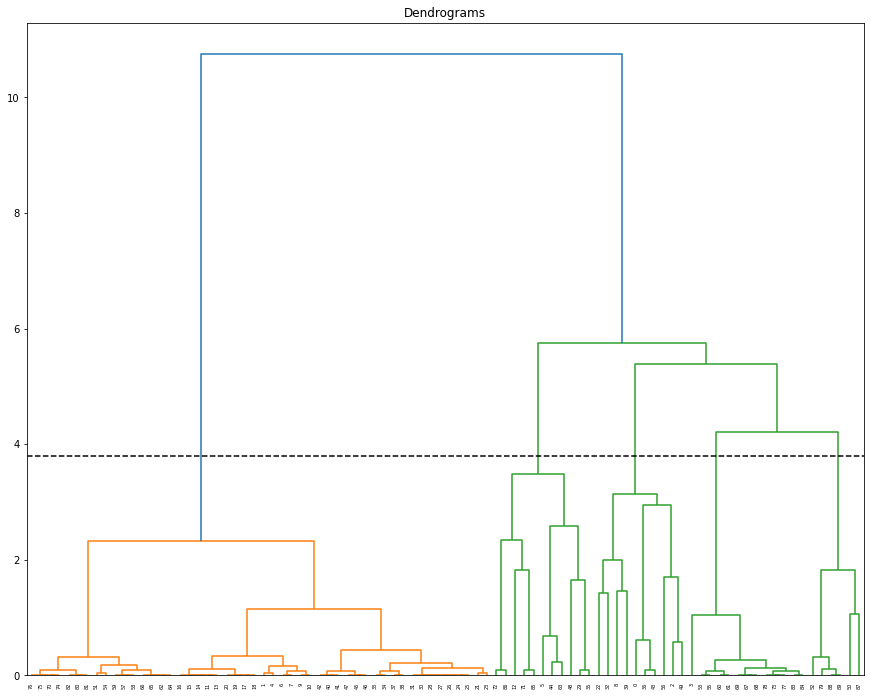

In [7]:
plt.figure(figsize=(15, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cat_df_onehot, method='ward'))
plt.axhline(y=3.8, color='k', linestyle='--');

In [8]:
## precict in which cluster disaster falls
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(cat_df_onehot)

In [9]:
cat_df_onehot['cluster']= clusters

In [10]:
cat_df_onehot

,Year,Duration_Acute,Duration_Acute,Duration_Chronic,Likelihood_Rare,Likelihood_Rare,Likelihood_Reoccurring,Warning Capability_No,Warning Capability_Yes,Disruption Position_Multi-tiered,Disruption Position_Single tier,cluster
0,0.000000,1,0,0,1,0,0,1,0,0,1,1
1,0.000000,1,0,0,0,0,1,0,1,1,0,3
2,0.047619,0,1,0,0,1,0,1,0,0,1,1
3,0.047619,1,0,0,1,0,0,1,0,1,0,4
4,0.047619,1,0,0,0,0,1,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.952381,0,0,1,1,0,0,0,1,1,0,0
86,0.952381,0,0,1,0,1,0,0,1,1,0,0
87,1.000000,1,0,0,0,0,1,1,0,0,0,2
88,1.000000,1,0,0,0,0,1,1,0,1,0,2


In [11]:
data['cluster']= clusters
data.head(20)
# plt.figure(figsize=(10, 7))  
# plt.scatter(cat_df_onehot['Warning Capability_No'], cat_df_onehot['Year'], c=cluster.labels_) 

,Year,Disruption,Duration,Likelihood,Warning Capability,Disruption Position,cluster
0,2000,Fire at the Philips microchip plant,Acute,Rare,No,Single tier,1
1,2000,Tropical cyclone - Leslie,Acute,Reoccurring,Yes,Multi-tiered,3
2,2001,Land Rover lay-off,Acute,Rare,No,Single tier,1
3,2001,9/11 terrorist attack,Acute,Rare,No,Multi-tiered,4
4,2001,Tropical cyclone - Allison,Acute,Reoccurring,Yes,Multi-tiered,3
5,2002,"West Coast ports lockout (Automotive,manufactu...",Acute,Rare,Yes,Multi-tiered,0
6,2002,Tropical cyclone - Lili,Acute,Reoccurring,Yes,Multi-tiered,3
7,2002,Tropical cyclone - Isidore,Acute,Reoccurring,Yes,Multi-tiered,3
8,2003,Bird Flu,Chronic,Rare,No,Multi-tiered,1
9,2003,Tropical cyclone - Isabel,Acute,Reoccurring,Yes,Multi-tiered,3


In [17]:
data[data['cluster'] ==4]

,Year,Disruption,Duration,Likelihood,Warning Capability,Disruption Position,cluster
3,2001,9/11 terrorist attack,Acute,Rare,No,Multi-tiered,4
53,2015,Valley Fire,Acute,Rare,No,Multi-tiered,4
55,2015,Butte Fire,Acute,Rare,No,Multi-tiered,4
60,2016,Sand Fire,Acute,Rare,No,Multi-tiered,4
61,2016,Clayton Fire,Acute,Rare,No,Multi-tiered,4
67,2017,"Wall Fire, Alamo Fire, Whittier Fire",Acute,Rare,No,Multi-tiered,4
68,2017,"Tubbs, Atlas, Nuns Fires",Acute,Rare,No,Multi-tiered,4
69,2017,Thomas' Wildfire,Acute,Rare,No,Multi-tiered,4
73,2018,Carr and Mendocino Complex fires,Acute,Rare,No,Multi-tiered,4
77,2018,Camp Fire,Acute,Rare,No,Multi-tiered,4


In [13]:
groups =data.groupby('cluster')['Disruption'].apply(list) 
print('group 0')
print(groups[0])
print(" ")
print('group 1')
print(groups[1])
print(" ")
print('group 2')
print(groups[2])
print(" ")
print('group 3')
print(groups[3])
print(" ")
print('group 4')
print(groups[4])
print(" ")


group 0
['West Coast ports lockout (Automotive,manufacturing,transport, Delay)\xa0', 'Influenza vaccine shortage', 'Severe winter conditions', 'Iceland Volcano', 'Port Strikes', 'Waldo Canyon Fire', 'Hurricane Harvey', 'US-China Trade conflicts', 'Kilauea Lava flow', 'COVID-19 - Good shortage', 'U.S.-China Trade War']
 
group 1
['Fire at the Philips microchip plant', 'Land Rover lay-off', 'Bird Flu', '\xa0Toy recalls due to lead poisoning', 'Toyota Motor Corp. Recalls', 'Gulf Oil spill', 'Great East Japan Earthquake, Tsunami, and Nuclear Accident (Electronic, Automotive, Infrastructure)', 'Evonik Chemical Plant Fire', 'Target cyber attack', 'Attack on Water Utility Chemical Controls ']
 
group 2
['Chemical Spill at Intel Plant', 'Explosion at China’s port city of L Tanjin', 'Cyber attack on Natural Gas compressor station', 'Energy Cyber Attack', 'Colonial Pipeline cyber attack', 'JBS meat processing cyber attack']
 
group 3
['Tropical cyclone - Leslie', 'Tropical cyclone - Allison', 'T

## Groups:
#### Five groups
gp 0:   Rare  events with warning capability

gp 1: Acute,  No Warning, Single tier (localised disruptions)

gp 2: Acute, Reoccuring, No Warning, Multi-tiered (reoccuring Man-made/targeted attacks)

gp 3: Acute, Reoccuring, Yes Warning, Multi-tiered (Recuring -- usually individual Natural Disasters )

gp 4: Acute, Rare, Multi-tiered (Rare attacks --> man-made)
